# **Part 1**

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read the image

In [26]:
original_image=cv2.imread("image.png")

The original image

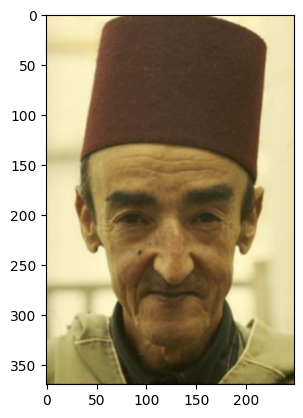

In [27]:
plt.figure()
image_rgb=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

Gray scale image

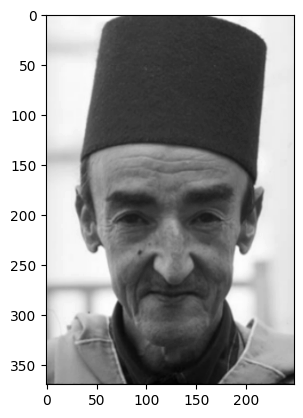

In [28]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_image,cmap='gray')

Noise reduction

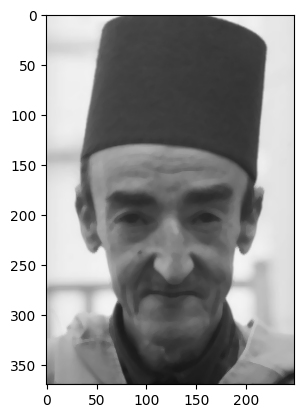

In [29]:
blurred_image = cv2.medianBlur(gray_image, 5)
plt.figure()
blurred_image_rgb=cv2.cvtColor(blurred_image,cv2.COLOR_BGR2RGB)
plt.imshow(blurred_image_rgb)

Edge detection

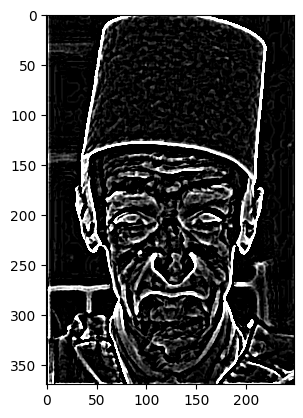

In [30]:
edges = cv2.Laplacian(blurred_image, cv2.CV_8U, ksize=5)
plt.figure()
plt.imshow(edges,cmap='gray')


Threshold

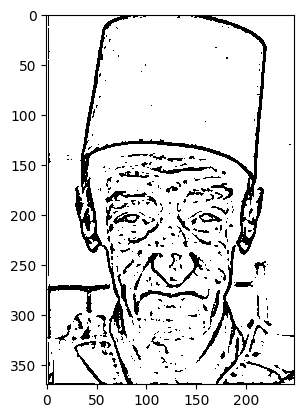

In [31]:
_, threshold_image = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)
plt.figure()
plt.imshow(threshold_image,cmap='gray')

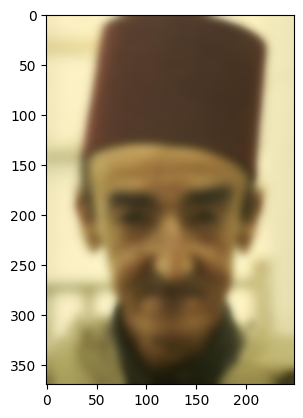

In [32]:
bilateral_image=original_image.copy()
for _ in range(5):
    bilateral_image = cv2.bilateralFilter(bilateral_image, d=9, sigmaColor=255, sigmaSpace=10)
plt.figure()
image_bilateral_rgb=cv2.cvtColor(bilateral_image,cv2.COLOR_BGR2RGB)
plt.imshow(image_bilateral_rgb)

Masking the edges with the image


In [33]:
edge_mask = cv2.cvtColor(threshold_image, cv2.COLOR_GRAY2BGR)
cartoon = cv2.bitwise_and(bilateral_image, edge_mask)

Cartoonifed image

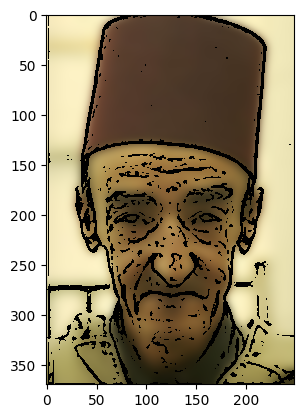

In [34]:
plt.figure()
cartoon_rgb=cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB)
plt.imshow(cartoon_rgb)

In [35]:
black_background = np.zeros_like(original_image)
cartoon_image = np.where(edge_mask == 255, bilateral_image, black_background)

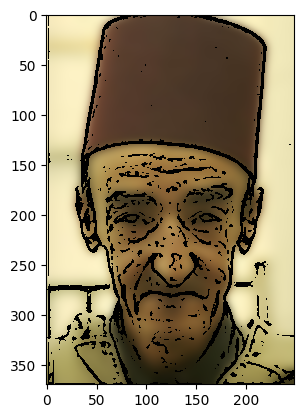

In [36]:
plt.figure()
cartoon_rgb=cv2.cvtColor(cartoon_image,cv2.COLOR_BGR2RGB)
plt.imshow(cartoon_rgb)